<a href="https://colab.research.google.com/github/Qnpy2024/Task-MVD-ED/blob/main/Diabetes_Predic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# NAMA: Muhammad Khairul Bin Nasir
# NIM: 231061005
# Prodi: Sains Data (SD23)

# Keterangan : Tugas 2

**Diabetes Prediction and Analysis**

Diabetes is often referred to as a silent epidemic, affecting millions worldwide without showing immediate symptoms. This dataset provides an opportunity to delve into the factors that contribute to diabetes and potentially predict its occurrence. If you find this notebook useful, please consider upvoting it.

# Import necessary libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset

In [44]:
data=pd.read_csv('/content/diabetes_prediction_dataset.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


**Initial Data Exploration**

Let's take a look at the first few rows of the dataset to understand its structure.

# Display the first few rows of the dataset


In [45]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


**Data Summary**

We'll now summarize the dataset to get an overview of the data types and missing values.



# Summary of the dataset

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Statistical Overview**

Let's get a statistical summary of the numeric columns in the dataset.

# Statistical summary of numeric columns

In [47]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


**Data Cleaning**

Before diving into analysis, let's check for any missing values and handle them appropriately.

# Check for missing values

In [48]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


**Exploratory Data Analysis**

Let's visualize the distribution of some key features and their relationship with diabetes.

# Distribution of age

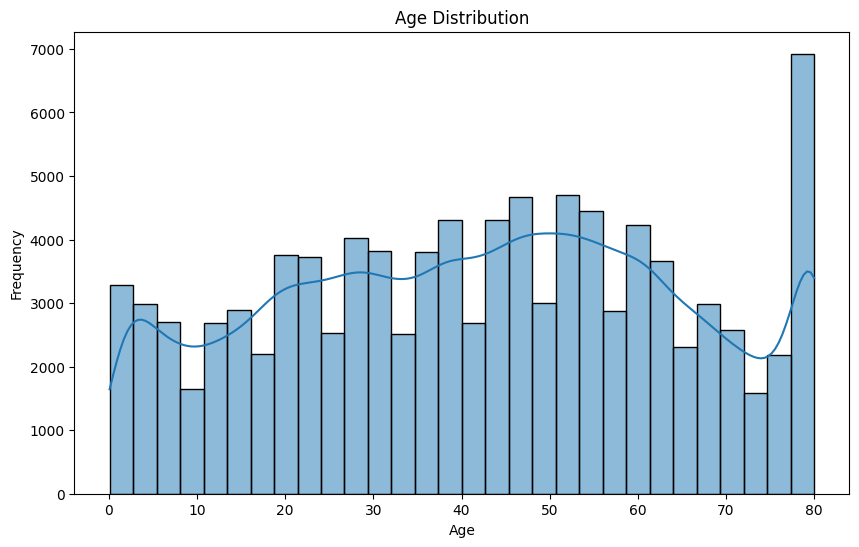

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of bmi

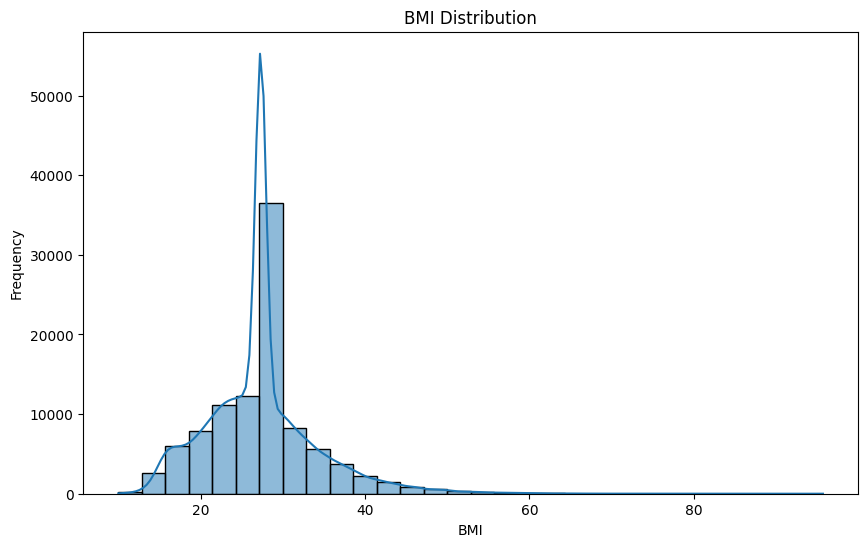

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Diabetes vs Non-Diabetes count

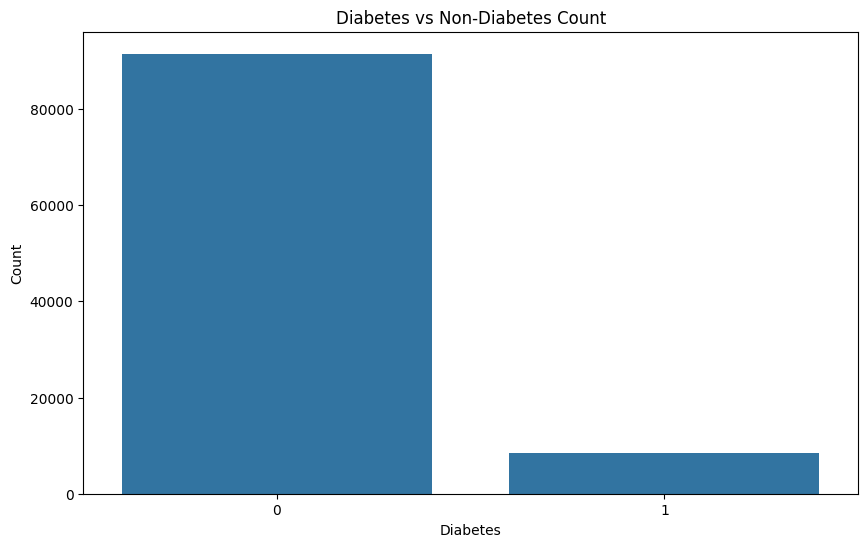

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetes', data=data)
plt.title('Diabetes vs Non-Diabetes Count')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

**Correlation Heatmap**

How the numeric features correlate with each other.

# Correlation Heatmap

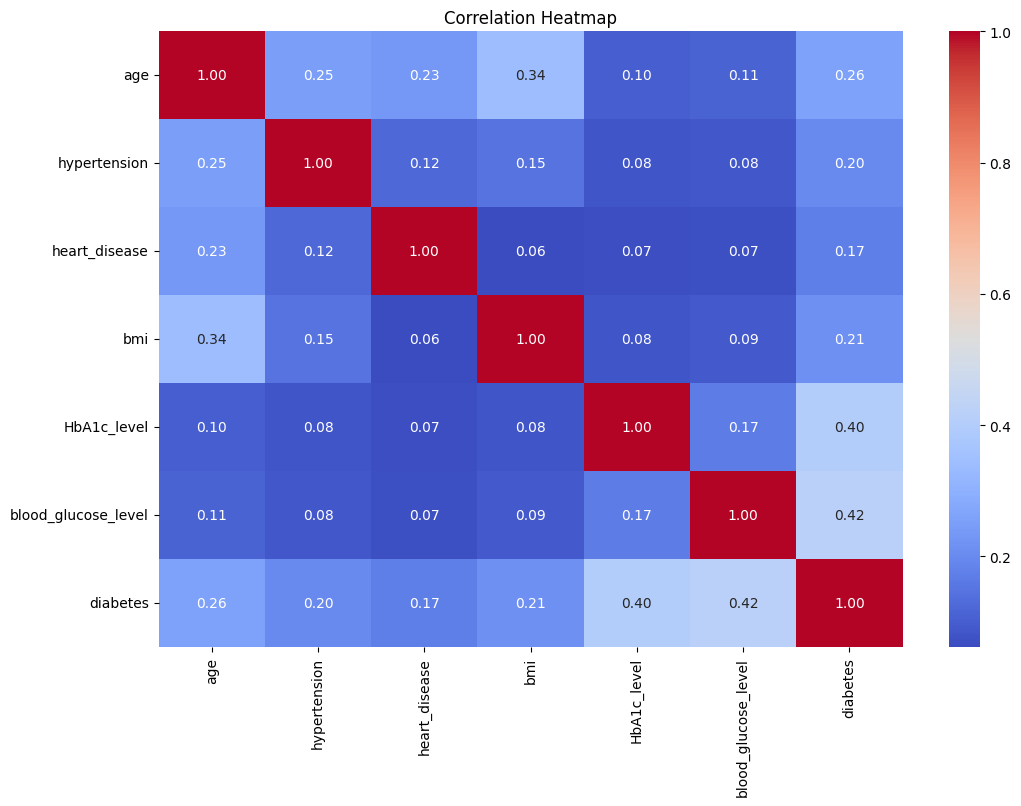

In [52]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Predictive Modeling**

Given the dataset, it would be useful to create a model to predict the likelihood of diabetes based on the available features.

# Prepare the data for modeling

In [53]:
X = data.drop('diabetes', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier

In [54]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Let's make predictions

In [55]:
y_pred = model.predict(X_test)

**Model Evaluation**

Let's evaluate the performance of our model using accuracy score, confusion matrix, and classification report.

# Make evaluate the model

In [56]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.9699,
 array([[18225,    67],
        [  535,  1173]]),
 '              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98     18292\n           1       0.95      0.69      0.80      1708\n\n    accuracy                           0.97     20000\n   macro avg       0.96      0.84      0.89     20000\nweighted avg       0.97      0.97      0.97     20000\n')

**Load Regresi Linear**

In [58]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(data['age'], data['bmi'])

**Make Line of Regresion**

In [59]:
line = slope * data['age'] + intercept

**Scatter Plot**

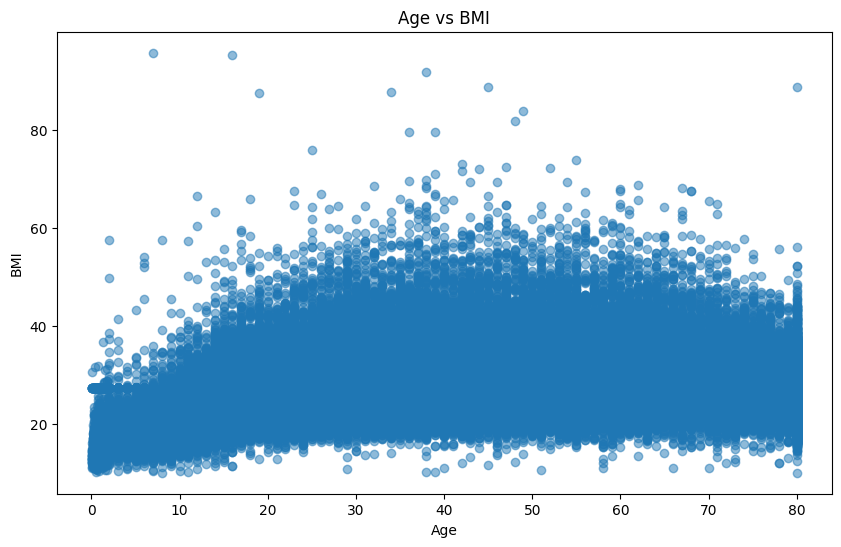

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['bmi'], alpha=0.5)
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

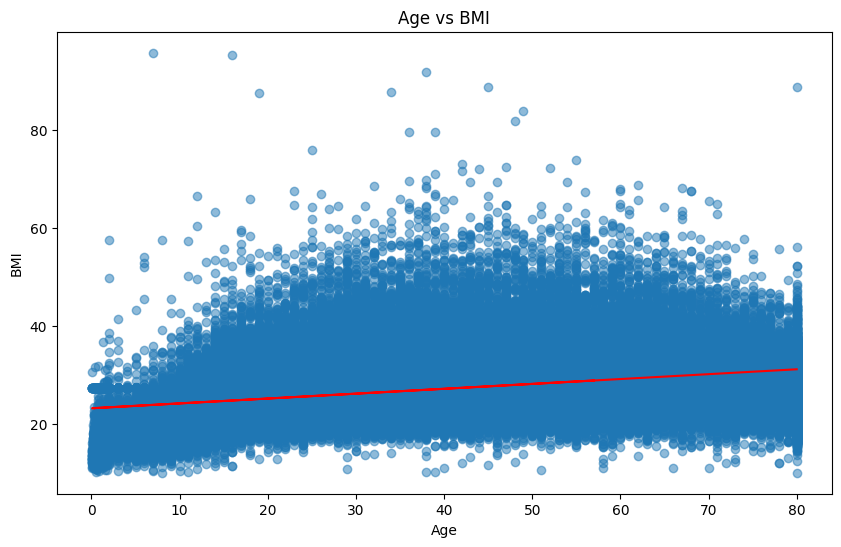

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['bmi'], alpha=0.5)
plt.plot(data['age'], line, color='red')
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()